In [1]:
import numpy as np
from pandas import DataFrame
from sympy import symbols, log, diff, lambdify, exp
import matplotlib.pyplot as plt

In [15]:
x1, x2 = symbols("x1, x2")
listVar = [x1, x2]
f = (x1**2+2*x2**2)
h1 = (2*x1+3*x2)
h2 = (-x2)

In [16]:
def gradien(x, t):
    # Create symbols needed
    # Set the barrier func
    # Create list for grad
    # Create list for count each point grad
    y1, y2 = x
    x1, x2, t1 = symbols("x1, x2, t1")
    symb = [x1, x2, t1]
    barr = f - (1./t1)*log((h1)*(h2))
    
    grad = []
    grad_eval = []
    
    # Look for grad in 2 variable
    for var in range(len(symb) - 1):
        grad.append(lambdify(symb, diff(barr, symb[var])))
        
    # Evaluate the grad 
    # for each given point
    for item in grad:
        temp = item(y1, y2, t)
        grad_eval.append(temp)
    grad_eval = np.array(grad_eval)
        
    return grad_eval

In [17]:
def hessian(x, t):
    # Create symbols needed
    # Set barrier function
    # Create list for grad (temp)
    # Create list for hess
    # Create list for count each point hess
    y1, y2 = x
    x1, x2, t1 = symbols("x1, x2, t1")
    symb = [x1, x2, t1]
    barr = f - (1./t1)*log((h1)*(h2))
    
    grad_temp = []
    hess = []
    
    # Iterate each index symbols
    # Find grad for count hess
    for idx in range(len(symb) - 1):
        grad_temp.append(diff(barr, symb[idx]))
    
    # Iterate each item in grad
    # Create temp_list to create nd-arr
    # Iterate each symb
    # Find hess
    # Calculate 
    for item in grad_temp:
        temp_hess = []
        for idx2 in range(len(symb) - 1):
            temp_hess.append(lambdify(symb, 
                                      diff(item, symb[idx2]))(y1, y2, t))
        hess.append(temp_hess)
    hess = np.array(hess)
    
    return hess

In [18]:
def Barrier_Method(x_init, m, t, mu=0.01, tol_barr=1e-5, tol_newton=1e-5, max_iter=1000):
    # Change obj_func to func
    # Store x_init
    # List for point iter
    # List for val iter
    # List for duality_gap
    # Iterator for barr
    # Print first init condition
    fObj = lambdify(listVar, f)
    xp = x_init
    xk = [xp]
    fxk = [fObj(xp[0], xp[1])]
    duality_gap = [m / t]
    k = 0
    print(f"Initial Condition: x={xp}, f(x)={fxk[k]:.4f}\n")
    
    # We start the barr_method
    # Loop until the condition met
    # Which is duality_gap (m / t) < tol_barr
    while m / t > tol_barr:
        # Start newton method
        i = 0
        d = np.array([[1], [1]])
        
        # Loop until the condition met
        # Which is norm(d) < tol_newton
        # And i > max_iter
        while np.linalg.norm(d) > tol_newton and i < max_iter:
            # Call grad and hess
            # Update d as -dot between hess.inv and grad
            # Update xp as xp+d
            # Store to xk
            # Update i
            gradX = gradien(xp, t)
            hessX = hessian(xp, t)
            d = np.dot(np.linalg.inv(hessX), gradX)
            xp = xp - d
            xk.append(xp)
            i = i + 1
            
        # Update params t
        # Update duality gap
        # Update fxk
        # Update k
        t = (1 + 1/(13 * np.sqrt(mu))) * t
        duality_gap.append(m / t)
        fxk.append(fObj(xp[0], xp[1]))
        k = k + 1
        
        # Print result for each iter of Barr_method
        print(f"Iteration: {k}; x = {xp}, f(x) = {fxk[k]:.4f}, gap = {duality_gap[k]:.4f}")
        
    xk = np.array(xk)
    
    return xk, fxk, duality_gap

In [19]:
def obj(x):
    return (x[0]**2 + 2*x[1]**2)

In [58]:
def feasibleSet(x, y):
    # define constraint
    c1 = lambda a, b : 2*a + 3*b
    c2 = lambda a, b : -a
#     c1 = lambda a, b : a**2 - 4
#     c2 = lambda a, b : np.exp(-a) - b
#     c3 = lambda a, b : a + 2*b - 4
#     c4 = lambda a, b : -a
#     c5 = lambda a, b : -b
    # Draw
#     & 
#          (c2(x,y)<=0) & 
#          (c3(x,y)<=0) & 
#          (c4(x,y)<=0) & 
#          (c5(x,y)<=0)
    plt.imshow(
        ((c1(x,y)<=0),
          (c2(x,y)<=0)).astype(int),
        extent = (x.min(), x.max(), y.min(), y.max()),
        origin = "lower",
        cmap = "GnBu"
    )

In [59]:
def learning_curve(fx, duality_gap):
    # Create figure
    # for obj func
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.plot(fs, c="r")
    ax1.scatter(len(fs) - 1, fs[-1], c="yellow")
    ax1.set(
        title = "Obj for each iter",
        xlabel = "Num of iter",
        ylabel = "Obj func",
        xlim = 0
    )
    
    # for duality_gap
    ax2.plot(duality_gap, c = "r")
    ax2.scatter(len(duality_gap) - 1, duality_gap[-1], c='yellow')
    ax2.set(
        title = "Duality gap for each iter",
        xlabel = "Num of iter",
        ylabel = "Duality gap",
        xlim = 0
    )
    plt.show()

In [60]:
def contour(x_min, x_max, y_min, y_max):
    # Data and step for each data
    delta = 0.025
    x = np.arange(x_min, x_max, delta)
    y = np.arange(y_min, y_max, delta)
    x, y = np.meshgrid(x, y)
    z = np.zeros(x.shape)
    
    # Start plot
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            xCord = x[i][j]
            yCord = y[i][j]
            z[i][j] = obj(np.array([[xCord], [yCord]]))
    CS = plt.contour(x, y, z)
    
    # Labeling
    plt.clabel(CS, fmt='%1.2f')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title("Contour obj func w feasible set and iter path")
    plt.show()

In [61]:
def plotAll(xs, fs, duality_gap):
    # Create figure
    plt.figure(figsize=(8, 6))
    plt.plot(xs[:,0], xs[:,1], 'r')
    plt.scatter(xs[-1][0], xs[-1][1], color='red')
    
    x_min, x_max = plt.gca().get_xlim()
    y_min, y_max = plt.gca().get_ylim()
    d = np.linspace(min(x_min, y_min, -0.25),
                    max(x_max, y_max, 2.25),
                    2000)
    x, y = np.meshgrid(d, d)
    
    feasibleSet(x, y)
    contour(x.min(), x.max(), y.min(), y.max())
    learning_curve(fs, duality_gap)

In [62]:
init = np.array([-2., 1.5])
xs, fs, duality_gap = Barrier_Method(init, 5, 0.1)

Initial Condition: x=[-2.   1.5], f(x)=8.5000

Iteration: 1; x = [1.16703283 2.07822453], f(x) = 10.0000, gap = 28.2609
Iteration: 2; x = [0.87738626 1.56242876], f(x) = 5.6522, gap = 15.9735
Iteration: 3; x = [0.65962725 1.17464865], f(x) = 3.1947, gap = 9.0285
Iteration: 4; x = [0.49591398 0.88311191], f(x) = 1.8057, gap = 5.1031
Iteration: 5; x = [0.37283279 0.66393184], f(x) = 1.0206, gap = 2.8843
Iteration: 6; x = [0.2802992  0.49915021], f(x) = 0.5769, gap = 1.6303
Iteration: 7; x = [0.21073158 0.37526582], f(x) = 0.3261, gap = 0.9215
Iteration: 8; x = [0.15842998 0.28212838], f(x) = 0.1843, gap = 0.5208
Iteration: 9; x = [0.11910915 0.21210677], f(x) = 0.1042, gap = 0.2944
Iteration: 10; x = [0.08954738 0.15946387], f(x) = 0.0589, gap = 0.1664
Iteration: 11; x = [0.06732257 0.11988644], f(x) = 0.0333, gap = 0.0940
Iteration: 12; x = [0.05061374 0.09013175], f(x) = 0.0188, gap = 0.0532
Iteration: 13; x = [0.03805188 0.0677619 ], f(x) = 0.0106, gap = 0.0300
Iteration: 14; x = [0.0

AttributeError: 'tuple' object has no attribute 'astype'

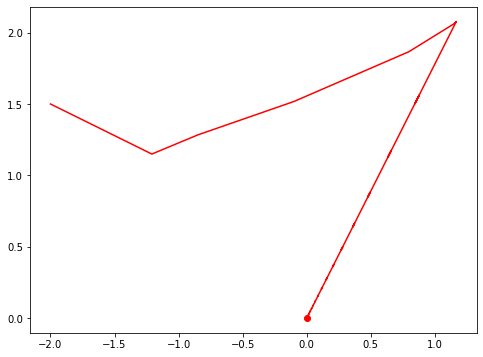

In [63]:
plotAll(xs, fs, duality_gap)